# Fifth Session, Notebook # 11: Introduction to AstroQuery

## Today's agenda:
0. __Workshop Overview__:
    * __When__: August 18th  1pm-5pm<!---*insert day* from *insert time range*--->
    * __Where__: CUNY Graduate Center <!---*insert room number--->
    * __What__: Today we will be practicing with AstroQuery!
    * __Want__ to lead a session for a topic? Some Days there will be small hack sessions for people to discuss problems they're working on.
    * __Online Resources__:  __https://daxfeliz.github.io/cunybridgebootcamp/__
    * __Program Schedule__: __https://tinyurl.com/4r35txe2__   
&nbsp;

1. __This session__:
* 

</br>
&nbsp;

2. __Next session__:
    * Open Hack Session and Introduction to LaTeX! __Make sure you bring your laptop to this session and future sessions__.


# AstroQuery

[AstroQuery](https://astroquery.readthedocs.io/en/latest/) is another package that is meant to provide a lot of support for doing astonomical queries from data bases or catalogs.



`AstroQuery` can be installed on your computer with Anaconda. To do so, you can enter the following command:
```sh
    conda install -c conda-forge astroquery
```

You can always update it via 
```sh
    conda update astroquery
```
This is just a __glimpse__ of all the services and resources that `AstroQuery` has available:

<img src="./images/astroquery1.png" alt="AstroQuery Features" width="600">
<img src="./images/astroquery2.png" alt="AstroQuery Features" width="600">
<img src="./images/astroquery3.png" alt="AstroQuery Features" width="600">
<img src="./images/astroquery4.png" alt="AstroQuery Features" width="600">




For purposes of today, we'll focus just on what astropy can do for units, time, coordinates, image manipulation, and more.

# Example: Grabbing Data from a publication from the VizieR portal with AstroQuery.

## What is VizieR?
The VizieR Catalogue Service is an astronomical catalog service provided by Centre de données astronomiques de Strasbourg. The origin of the service dates back to 1993, when it was founded by the European Space Agency as the European Space Information System Catalogue Browser. Located at [https://vizier.cds.unistra.fr/viz-bin/VizieR](https://vizier.cds.unistra.fr/viz-bin/VizieR)

## In this example, we're grabbing a data table from [Kaltenegger et al. 2021](https://arxiv.org/pdf/2101.07898.pdf)

# The data from the tables available are located on VizieR [here](https://vizier.cds.unistra.fr/viz-bin/VizieR-3?-source=J/AJ/161/233&-out.max=50&-out.form=HTML%20Table&-out.add=_r&-out.add=_RAJ,_DEJ&-sort=_r&-oc.form=sexa)


In [7]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1 #without this line, Vizier won't query the entire table, just first 50 or so rows
catalog_list = Vizier.find_catalogs('Kaltenegger 2021 J/AJ/161/233')
print(catalog_list)

OrderedDict([('J/AJ/161/233', </>)])


In [8]:
# How many tables are there in Kaltenegger et al. 2021?
print(Vizier.get_catalogs(catalog_list))

TableList with 3 tables:
	'0:J/AJ/161/233/table3' with 24 column(s) and 4239 row(s) 
	'1:J/AJ/161/233/table5' with 24 column(s) and 2253 row(s) 
	'2:J/AJ/161/233/table6' with 8 column(s) and 8971 row(s) 


In [9]:
# let's use the first table in this query (Table 3 which is index # 0)
catalog =  Vizier.get_catalogs(catalog_list)[0].to_pandas() #using to_pandas() turns this into a pandas DataFrame
catalog.head(10)

,TIC,RAJ2000,DEJ2000,Tmag,Teff,Mass,Rad,Lum,Dist,ELAT,GLAT,aEA,aEM,aRV,PerEA,PerEM,PerRV,Dwell,Dur,CSD,Gaia,_2MASS,Errors,Simbad
0,3664898,127.450266,26.773371,10.50,2814,0.124,0.099,0.001,3.58,7.5481,32.4155,0.024,0.075,0.029,3.91,21.280001,5.25,24.110001,27.344999,27.34502,703790044252850688,08294949+2646348,errors,Simbad
1,79611981,54.003249,-44.514310,9.47,2905,0.156,0.127,0.002,3.67,-60.7761,-52.9014,0.032,0.098,0.039,5.39,28.570000,7.25,38.660000,50.886002,50.88554,4848140361962951552,03355969-4430453,errors,Simbad
2,274127413,298.481858,44.412973,10.35,2865,0.142,0.115,0.001,4.66,63.1035,8.5058,0.029,0.088,0.035,4.72,25.320000,6.35,43.632999,54.055000,54.05461,2079073928612821760,19535508+4424550,errors,Simbad
3,391039604,161.085375,-61.202862,10.33,2898,0.131,0.105,0.001,4.83,-60.0121,-2.0131,0.027,0.082,0.033,4.49,23.850000,6.04,45.127998,53.014999,53.01460,5254061535097566848,10442131-6112384,errors,Simbad
4,190138951,235.194747,-51.028056,11.10,2824,0.130,0.105,0.001,5.32,-30.5227,3.3979,0.026,0.079,0.031,4.15,22.530001,5.58,21.836000,25.261999,25.26153,5985290231327158144,15404341-5101357,errors,Simbad
5,370955883,145.692189,-68.880142,9.74,3107,0.213,0.182,0.004,6.50,-69.4945,-11.9663,0.051,0.148,0.062,8.99,45.080002,12.14,45.127998,53.014999,53.01460,5243594081269535872,09424635-6853060,errors,Simbad
6,407688400,326.592853,38.217534,9.54,3269,0.214,0.183,0.005,7.04,47.7032,-11.6124,0.056,0.160,0.069,10.48,50.509998,14.20,48.139000,51.955002,51.95487,1952802469918554368,21462206+3813047,errors,Simbad
7,219223742,62.611193,-53.612661,10.51,3087,0.164,0.135,0.002,7.11,-71.4636,-45.0891,0.038,0.113,0.047,6.81,34.299999,9.19,61.438999,77.632004,77.63224,4780100658292046592,04102815-5336078,errors,Simbad
8,406857100,274.743107,66.190678,10.53,3120,0.171,0.142,0.003,7.65,88.0641,27.8982,0.041,0.120,0.050,7.32,36.560001,9.88,225.356003,351.777008,105.80200,2257597439718033536,18185725+6611332,errors,Simbad
9,233068870,270.571130,64.260637,10.34,3062,0.195,0.164,0.003,7.78,87.6877,29.5380,0.045,0.133,0.055,7.88,39.990002,10.63,251.869003,325.953003,243.13900,2161121135533953536,18021660+6415445,errors,Simbad


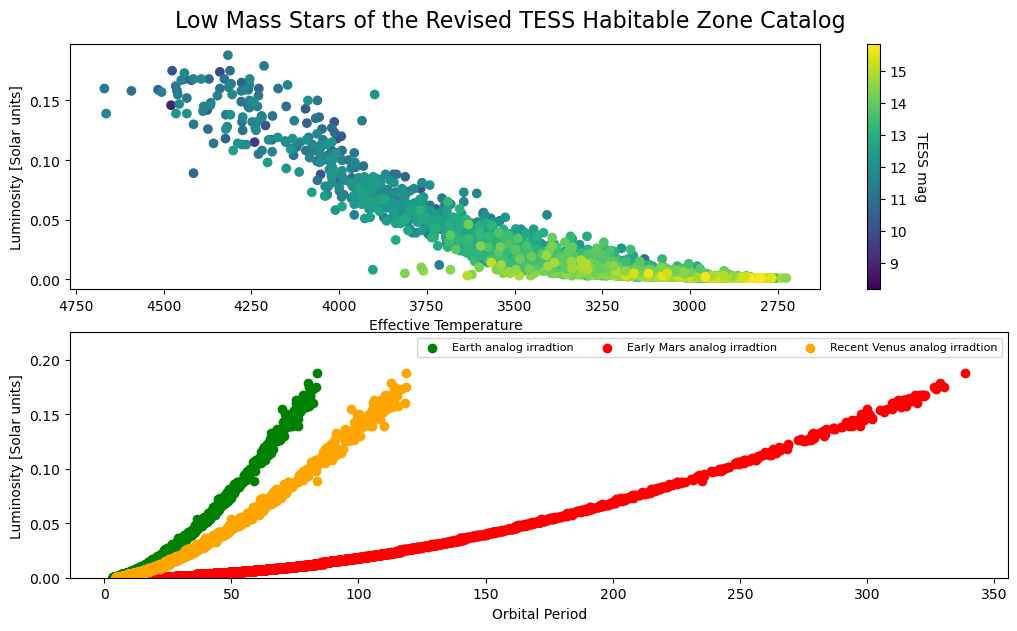

In [87]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
sc1=ax1.scatter(catalog['Teff'],catalog['Lum'],c=catalog['Tmag'])
ax1.set_xlabel('Effective Temperature')
ax1.set_ylabel('Luminosity [Solar units]')
ax1.invert_xaxis()
cbar1=fig.colorbar(sc1)
cbar1.ax.set_ylabel('TESS mag', rotation=270,labelpad=15)


ax2.scatter(catalog['PerEA'],catalog['Lum'],c='green',label='Earth analog irradtion')
ax2.scatter(catalog['PerEM'],catalog['Lum'],c='Red',label='Early Mars analog irradtion')
ax2.scatter(catalog['PerRV'],catalog['Lum'],c='orange',label='Recent Venus analog irradtion')
ax2.set_xlabel('Orbital Period')
ax2.set_ylabel('Luminosity [Solar units]')
ax2.legend(loc='upper right',fontsize=8,ncols=3)
ax2.set_ylim(0,0.225)

fig.suptitle('Low Mass Stars of the Revised TESS Habitable Zone Catalog',x=0.5,y=1.02,fontsize=16)
fig.tight_layout(pad=0)
plt.show()

# Making a Hertzsprung-Russell diagram using GAIA data!

To query the GAIA Data Release 3 catalog, we can do an Asynchronous queries and save our results at server side and can depend on the user files quota. These queries can be accessed at any time. For anonymous users, results are kept for three days.


### Quick Side note: Querying data with ADQL:

ADQL is a data query language similar to SQL, built for astronomical data purposes. Its syntax is similar enough to SQL if you are familiar with it, though with some differences. In ADQL you write queries to fetch data from the database, here, from the Gaia Archive Database. If you are aware of basic level SQL, you can skip the following details:

- A query has a specific structure it pertains to, just like a command. It is a compound of mainly these parts (only SELECT and FROM parts are required, others are optional) -

- SELECT part- It tells the columns we want to fetch in the query. The columns can be fetched using either `column_name` directly, or in case of complex queries involving multiple tables, require table_name.column_name to avoid any column name conflicts. We can also use ADQL functions or arithmetics in the SELECT part to manipulate the data before fetching it. If we want to fetch all columns from the table, we can use `SELECT *` or `SELECT table_name.*`. We can also set the (maximum) number of rows from the top we want to query using `SELECT TOP required_number` (Similarly, for bottom rows, we can use the keyword BOTTOM).

- `FROM`: tells the table we want to fetch data from. It usually consists the schema name (which is a logical sub-structure of a database) and the table name. For example, for fetching the source data from the Gaia DR3 schema, we will have to use `FROM gaiadr3.gaia_source`.

- `WHERE`: tells the conditions for fetching the data. As in the above example, we used two conditions other than the globular cluster name. These can be written as `WHERE gaia_source.parallax>=5` AND `gaia_source.parallax_over_error>=20`, where `AND` is a restricted keyword in ADQL used to signify that both these conditions must be met for the queried rows

- `ORDER BY`: tells how the data should be Ordered before fetching the data. We can use one or more colums to order the data on and DESC or ASC are used to specify the ordering to be Descending or Ascending respectively. The data is only ordered for the query and no changes are made in the actual data table. If we need the data to be ordered randomly, we need to use `ORDER BY` random_item, where random_item is a restricted keyword in ADQL.

- So, a simple query structure is `SELECT <columns> FROM <tables> WHERE <conditions> ORDER BY <columns>`

There are more such parts we can add like `GROUP BY` (to create factor sets/subsets that have identical values for one or more columns, used to compute aggregates), `INNER JOIN` (to make computations on one or more referenced columns within a table), `OUTER JOIN` (to make computation based on multiple tables lined by one or more referenced columns), etc. The main distiction between SQL and ADQL is the addition of Geometric extension functions to SQL.


#### Writing a simple query:
We're going to now look at a very simple ADQL query - Let's select the 100 stars closest to Earth (so, with the largest parallaxes) using ADQL. The syntax for this query goes as follows:

We select the top 100 results:

`SELECT TOP 100`

...and the following columns:

`gaia_source.source_id, gaia_source.ra, gaia_source.ra_error, gaia_source.dec, gaia_source.dec_error, gaia_source.parallax, gaia_source.parallax_error`

...from the DR3 Source catalog:

`FROM gaiadr3.gaia_source`

...where the parallax is greater than 0 (to avoid issues with improperly catalogued parallaxes):

`WHERE gaia_source.parallax >= 0`

...and the results are in descending order by parallax to get the top 100 entries with maximum parallax:

`ORDER BY gaia_source.parallax DESC`

Putting the whole query together:

`SELECT TOP 100 gaia_source.source_id, gaia_source.ra, gaia_source.ra_error, gaia_source.dec, gaia_source.dec_error, gaia_source.parallax, gaia_source.parallax_error FROM gaiadr3.gaia_source WHERE gaia_source.parallax >= 0 ORDER BY gaia_source.parallax DESC`

### Back to our cross-matching example


Queries retrieved results can be stored locally in memory (by default) or in a file.

In [135]:
def send_radial_gaia_query(query_size=1000000, distance=200, **kwargs):
    """
    Sends an archive query for d < 200 pc, with additional filters taken from
    Gaia Data Release 3: Observational Hertzsprung-Russell diagrams (Sect. 2.1)
    Gaia Collaboration, Babusiaux et al. 2018
    (https://doi.org/10.1051/0004-6361/201832843)

    NOTE: 10000000 is a maximum query size (~76 MB / column)

    Additional keyword arguments are passed to TapPlus.launch_job_async method.
    """    
    from astroquery.gaia import Gaia
    # This query uses ADQL syntax to submit a query
    # We are using a set of criteria outlined by Babusiaux et al. 2018
    job = Gaia.launch_job_async("select top {}".format(query_size)+
                #" lum_val, teff_val,"
                #" ra, dec, parallax,"
                " bp_rp, phot_g_mean_mag+5*log10(parallax)-10 as mg"
         " from gaiadr3.gaia_source"
         " where parallax_over_error > 10"
         " and visibility_periods_used > 8"
         " and phot_g_mean_flux_over_error > 50"
         " and phot_bp_mean_flux_over_error > 20"
         " and phot_rp_mean_flux_over_error > 20"
         " and phot_bp_rp_excess_factor <"
            " 1.3+0.06*power(phot_bp_mean_mag-phot_rp_mean_mag,2)"
         " and phot_bp_rp_excess_factor >"
            " 1.0+0.015*power(phot_bp_mean_mag-phot_rp_mean_mag,2)"
         " and astrometric_chi2_al/(astrometric_n_good_obs_al-5)<"
            "1.44*greatest(1,exp(-0.4*(phot_g_mean_mag-19.5)))"
         +" and 1000/parallax <= {}".format(distance), **kwargs)

    return job

In [12]:
# run job, this may take a while (~30min)
import numpy as np
import pandas as pd
try:
    gaiarec = pd.read_csv("gaia-hrd-dr3-200pc.csv")
    bp_rp, mg = gaiarec.bp_rp, gaiarec.mg
except (FileNotFoundError,OSError) as e:
    print(e)
    job = send_radial_gaia_query(dump_to_file=True, output_format="csv",
                                 output_file="gaia-hrd-dr3-200pc.csv",
                                 query_size=10000000)
    gaiarec = job.get_results()
    bp_rp = gaiarec['bp_rp'].data
    mg = gaiarec['mg'].data
    

In [13]:

gaiarec.head(10)

,bp_rp,mg
0,0.795505,4.572111
1,2.165551,9.105893
2,1.269135,6.458955
3,2.588948,11.339489
4,2.755577,11.013251
5,0.010123,1.487231
6,2.691968,10.502093
7,2.538270,10.136544
8,0.440062,2.684663
9,1.204395,6.171388


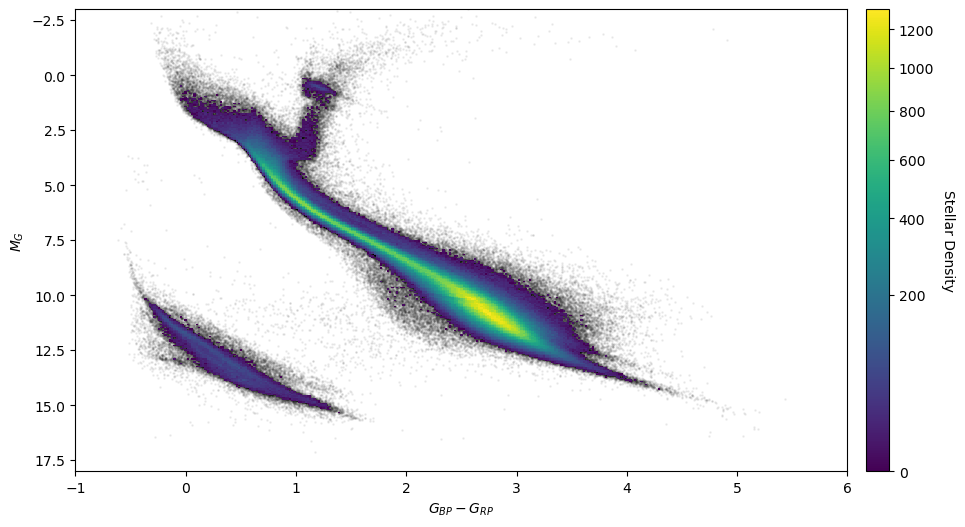

In [129]:
# plot the H-R diagram for 1 M stars within 200 pc from the Sun
import matplotlib.pyplot as plt
from matplotlib import colors
# plt.rc('text', usetex=True)

fig, ax = plt.subplots(figsize=(12, 6))
# only show 2D-histogram for bins with more than 10 stars in them
h = ax.hist2d(bp_rp, mg, bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)
# fill the rest with scatter (set rasterized=True if saving as vector graphics)
ax.scatter(bp_rp, mg, alpha=0.05, s=1, color='k', zorder=0)
ax.set_xlim(-1,6)
ax.set_ylim(-3,18)
ax.invert_yaxis()
cb = fig.colorbar(h[3], ax=ax, pad=0.02)
ax.set_xlabel(r'$G_{BP} - G_{RP}$')
ax.set_ylabel(r'$M_{G}$')
cb.set_label("Stellar Density",rotation=270,labelpad=15)
plt.show()

# Finding individual stars

In [51]:
from astroquery.vizier import Vizier
result = Vizier.query_object("Proxima Centauri")
print(result)

TableList with 335 tables:
	'0:METAobj' with 5 column(s) and 11 row(s) 
	'1:ReadMeObj' with 5 column(s) and 11 row(s) 
	'2:I/87B/catalog' with 13 column(s) and 1 row(s) 
	'3:I/196/main' with 14 column(s) and 1 row(s) 
	'4:I/196/annex1' with 10 column(s) and 1 row(s) 
	'5:I/197A/tic' with 10 column(s) and 3 row(s) 
	'6:I/230/shb' with 15 column(s) and 1 row(s) 
	'7:I/239/hip_main' with 14 column(s) and 1 row(s) 
	'8:I/239/tyc_main' with 11 column(s) and 1 row(s) 
	'9:I/252/out' with 8 column(s) and 152 row(s) 
	'10:I/255/out' with 9 column(s) and 10 row(s) 
	'11:I/259/tyc2' with 10 column(s) and 1 row(s) 
	'12:I/271/out' with 11 column(s) and 219 row(s) 
	'13:I/279/catalog' with 11 column(s) and 1 row(s) 
	'14:I/280B/ascc' with 12 column(s) and 1 row(s) 
	'15:I/284/out' with 14 column(s) and 600 row(s) 
	'16:I/289/out' with 13 column(s) and 29 row(s) 
	'17:I/294A/ucac2bss' with 12 column(s) and 1 row(s) 
	'18:I/297/out' with 19 column(s) and 650 row(s) 
	'19:I/305/out' with 11 column(s)

# Cross-Matching catalogs

Define a SkyCoord object (See _`Notebook #10: Astropy`_) with the average coordinates of the cluster which may be looked up on Simbad. 

### What is Simbad?
The Simbad astronomical database is a service also provided by Centre de données astronomiques de Strasbourg (CDS). Simbad provides basic data, cross-identifications, bibliography and measurements for astronomical objects outside the solar system. AstroQuery can query Simbad directly as demonstrated here; however this feature will not be covered in this tutorial. Located at [http://simbad.cds.unistra.fr/simbad/](http://simbad.cds.unistra.fr/simbad/)

Documentation for doing queries in Simbad with AstroQuery can be found [here](https://astroquery.readthedocs.io/en/latest/simbad/simbad.html).

In this example, we'll work with the open cluster [__NGC 188__](http://simbad.u-strasbg.fr/simbad/sim-id?Ident=NGC+188)

### Side Note: Vizier has a TON of catalogs. If you're ever unsure what catalog code to use (ex: "I/345"), you can look up the code by catalog name from here:
[https://cdsarc.cds.unistra.fr/viz-bin/cat](https://cdsarc.cds.unistra.fr/viz-bin/cat)

In [100]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.coordinates import Angle, Distance

# Simbad provides parallax instead of distance. However, we can convert one into
# the other using AstroPy tools

ngc188_distance = Distance(parallax = Angle(0.5053 * u.mas)) #mas is milli arcseconds

# we can define the center of our cluster with some coordinates
# Right Ascension, Declination, Distance, proper motion (in ra and dec)
ngc188_center_3d = SkyCoord(ra            = 12.11 * u.deg, #deg is degrees
                            dec           = 85.26 * u.deg,
                            distance      = ngc188_distance,
                            pm_ra_cosdec  = -2.3087 * u.mas / u.yr, #yr is year
                            pm_dec        = -0.9565 * u.mas / u.yr)

# We now query the stars in the cluster from the Gaia EDR3 catalogue 
# on VizieR and define a SkyCoord object for them as well:
from astroquery.vizier import Vizier
from astropy.time import Time
import numpy as np

v = Vizier(catalog = "I/350")         #   I/350 is Gaia eDR3 catalogue
v.ROW_LIMIT = -1                      #   Remove the default row limit to get
                                      #   all the stars

# Query all Gaia stars within 0.5 degrees of the cluster center
result = v.query_region(ngc188_center_3d, radius = 0.5 * u.deg)
gaia_table = result[0]

# Remove stars that are too faint
gaia_table = gaia_table[gaia_table['Gmag'] < 19]
# Remove stars that are too far away
gaia_table = gaia_table[gaia_table['Plx'] > 0.25 * u.mas]

# Create a SkyCoord object containing the coordinates of all of the queried stars
ngc188_coords = SkyCoord(
    ra = gaia_table['RA_ICRS'],
    dec = gaia_table['DE_ICRS'],
    distance = Distance(parallax = Angle(gaia_table['Plx'])),
    pm_ra_cosdec = gaia_table['pmRA'],
    pm_dec = gaia_table['pmDE'],
    obstime = Time('J2016'))   #  Gaia EDR3 observations are all in J2016

# Calculate 3D separations
sep3d = ngc188_coords.separation_3d(ngc188_center_3d)
# Calculate velocity space separations (use Pythagorean theorem)
pm_diff = np.sqrt(
    (ngc188_coords.pm_ra_cosdec - ngc188_center_3d.pm_ra_cosdec)**2 +
    (ngc188_coords.pm_dec - ngc188_center_3d.pm_dec)**2)

# Stars that are too far from each other in 3D space (say, further than
# 50 pc) or stars that have very different proper motions (say, more than
# 1.5 mas / yr) do not belong to the cluster
ngc188_members_mask = (sep3d < 50 * u.pc) & (pm_diff < 1.5 * u.mas/u.yr)
ngc188_coords = ngc188_coords[ngc188_members_mask]

# Print total number of identified members
len(ngc188_coords)

244

In [104]:
gaia_table.to_pandas().head(10) #convert to dataframe, then show top 10 rows as a preview

,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RUWE,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RVDR2,e_RVDR2,Tefftemp,loggtemp,PS1,SDSSDR13,SkyMapper2,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000,DEJ2000
0,12.773032,0.0839,84.780342,0.0727,573362294177391616,1.9255,0.0902,14.760,-7.171,0.104,12.901,0.093,0.932,1352.599976,1.69010,17.859423,0.003071,296.809998,6.3459,19.157347,0.023380,1620.199951,8.9171,16.723950,0.007070,2.433397,NaN,NaN,NaN,NaN,209730127729647200,<NA>,<NA>,874001252,17.859423,0.003071,1352.599976,12.773382,84.780284
1,14.151603,0.1463,84.792813,0.1292,573363054388266752,0.8329,0.1584,5.527,-3.845,0.187,3.971,0.179,1.003,526.130005,0.95254,18.884632,0.003385,141.169998,9.2524,19.964169,0.071213,578.700012,6.9217,17.841770,0.013525,2.122398,NaN,NaN,NaN,NaN,209750141513952192,<NA>,<NA>,874001376,18.873680,0.003373,531.469971,14.151791,84.792796
2,13.680818,0.0671,84.780311,0.0592,573363153170854656,0.8470,0.0723,2.385,2.381,0.089,-0.142,0.080,0.951,1699.800049,1.43430,17.611385,0.002904,625.280029,10.4190,18.348354,0.018306,1521.900024,10.9130,16.791931,0.008654,1.556423,NaN,NaN,NaN,NaN,209730136803707200,<NA>,<NA>,874001328,17.611385,0.002904,1699.800049,13.680702,84.780311
3,13.467402,0.2033,84.792946,0.1728,573363226184519168,0.5928,0.2119,19.080,18.403,0.255,-5.037,0.225,2.227,823.650024,2.07790,18.398014,0.003885,274.079987,8.0866,19.243853,0.032156,1024.599976,11.2040,17.221500,0.012459,2.022352,NaN,NaN,NaN,NaN,209750134679902528,<NA>,<NA>,874001316,18.388815,0.003869,830.650024,13.466501,84.792969
4,13.789755,0.0865,84.808442,0.0719,573363324969551360,0.3704,0.0929,0.834,-0.657,0.103,0.513,0.101,1.057,1390.199951,1.42250,17.829659,0.002971,688.619995,8.5933,18.243595,0.013833,971.200012,8.4709,17.279621,0.010196,0.963974,NaN,NaN,NaN,NaN,209770137894530944,<NA>,<NA>,875001410,17.829659,0.002971,1390.199951,13.789788,84.808440
5,13.490407,0.1594,84.812733,0.1311,573363359329289344,0.7398,0.1653,7.934,-7.046,0.197,3.647,0.175,1.017,553.210022,1.06590,18.830133,0.003459,135.779999,7.2976,20.006413,0.058418,610.770020,7.5784,17.783200,0.013992,2.223213,NaN,NaN,NaN,NaN,209770134901196096,<NA>,<NA>,875001382,18.817390,0.003445,559.750000,13.490753,84.812717
6,13.536455,0.0761,84.818896,0.0640,573363359329290240,0.7486,0.0796,8.197,8.177,0.093,-0.576,0.086,0.989,1551.099976,1.45160,17.710745,0.002937,544.570007,8.9697,18.498404,0.018100,1440.800049,10.9140,16.851350,0.009051,1.647053,NaN,NaN,NaN,NaN,209780135359553504,<NA>,<NA>,875001386,17.710745,0.002937,1551.099976,13.536053,84.818899
7,13.635230,0.0508,84.822504,0.0416,573363397985649408,0.4787,0.0530,9.978,-8.272,0.060,5.581,0.056,0.995,3250.199951,2.20340,16.907583,0.002852,1591.599976,13.8970,17.333930,0.009882,2389.399902,9.4465,16.302187,0.005719,1.031742,NaN,NaN,NaN,NaN,209780136349877824,<NA>,<NA>,875001396,16.907583,0.002852,3250.199951,13.635637,84.822479
8,13.056681,0.0372,84.772843,0.0336,573363501064865792,0.5277,0.0411,0.561,0.491,0.044,-0.272,0.042,0.986,4979.500000,2.47890,16.444395,0.002808,2441.600098,10.1670,16.869339,0.005313,3613.600098,9.2405,15.853040,0.004690,1.016299,NaN,NaN,NaN,NaN,209720130565318240,<NA>,<NA>,874001277,16.444395,0.002808,4979.500000,13.056657,84.772844
9,13.265345,0.0688,84.775627,0.0590,573363565487712512,0.7017,0.0733,7.851,7.748,0.081,-1.267,0.079,0.973,1770.300049,1.58900,17.567255,0.002923,632.250000,10.7820,18.336319,0.018724,1580.400024,8.8261,16.750996,0.007145,1.585323,NaN,NaN,NaN,NaN,209730132649831552,<NA>,<NA>,874001293,17.567255,0.002923,1770.300049,13.264967,84.775632


### Now load cluster stars from the 2MASS catalogue. 
We are not going to verify membership here because we will eventually cross-match them onto Gaia stars and non-members will not find matches and disappear on their own.

In [105]:
v = Vizier(catalog = "II/246", columns=['*', 'Date'])       # Include date of observation
v.ROW_LIMIT = -1

# similar to the step above, we're going to query the region around our cluster center
# but this time using the 2MASS catalog ("II/246")

result = v.query_region(ngc188_center_3d, radius = 0.5 * u.deg)
tmass_table = result[0]
len(tmass_table)

5014

### Now to Cross-match
Define a Time object for the date when 2MASS observations were taken:

   Date   
----------
1999-10-19


In [117]:
print(np.unique(tmass_table['Date']))
print(' ')
tmass_epoch = Time(np.unique(tmass_table['Date']))
print(tmass_epoch)
print(tmass_epoch.jyear)
print(tmass_epoch.jd)

   Date   
----------
1999-10-19
 
['1999-10-19 00:00:00.000']
[1999.79603012]
[2451470.5]


Define a SkyCoord object for 2MASS stars (we only need RA and DEC):



In [118]:
tmass_coords = SkyCoord(tmass_table['RAJ2000'], tmass_table['DEJ2000'])

Advance Gaia coordinates to the 2MASS observation date so that we could compare the two together:

To read more about accounting for space motion, check out the [__Astropy documentation__](https://docs.astropy.org/en/stable/coordinates/apply_space_motion.html)

In [119]:
ngc188_coords_1999 = ngc188_coords.apply_space_motion(tmass_epoch)

Run the cross-match:

To read more about matching catalogs from coordinates, check out this [__Astropy documentation__](https://docs.astropy.org/en/latest/api/astropy.coordinates.SkyCoord.html#astropy.coordinates.SkyCoord.match_to_catalog_sky)

In [120]:
idx_gaia, sep2d_gaia, sep3d = ngc188_coords_1999.match_to_catalog_sky(tmass_coords)

Plot a histogram of separations:

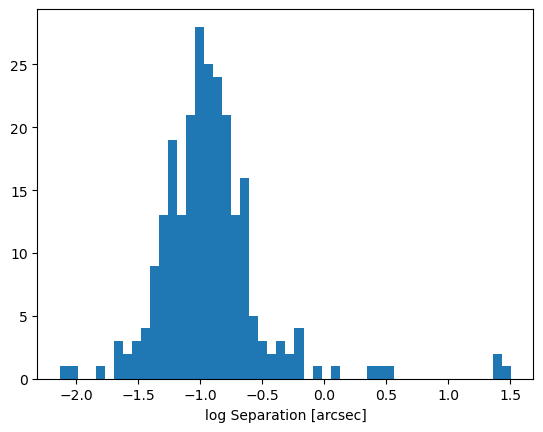

In [126]:
import matplotlib.pyplot as plt

plt.hist(np.log10(sep2d_gaia.arcsec), bins = 50);
plt.xlabel('log Separation [arcsec]')
plt.show()     

Get apparent J and G magnitudes and make a color-magnitude diagram

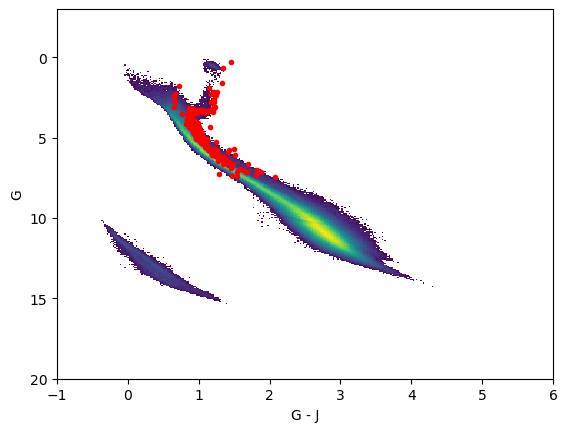

In [142]:
#Let's plot our results over the previous GAIA query


Jmag = tmass_table['Jmag'][idx_gaia]          # Use the cross-match indices
Gmag = gaia_table[ngc188_members_mask]['Gmag']
#convert to absolute magnitude
# M = m - 5log10(d) + 5
# distance from parallax (in mas) is d = 1000 / parallax
MGmag = Gmag - 5*np.log10(1000/gaia_table[ngc188_members_mask]['Plx']) + 5

tmass_bp_rp = gaia_table[ngc188_members_mask]['BPmag'] - gaia_table[ngc188_members_mask]['RPmag']
plt.hist2d(bp_rp, mg, bins=300, cmin=10, norm=colors.PowerNorm(0.5), zorder=0.5)
plt.plot(tmass_bp_rp, MGmag, 'r.')
plt.xlim(-1,6)
plt.ylim(-3,20)
plt.gca().invert_yaxis()

plt.xlabel('G - J')
plt.ylabel('G')
plt.show()